In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


kmeans usig built in functions

In [ ]:
x=np.array(data['Annual Income (k$)'])
y=np.array(data['Spending Score (1-100)'])

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


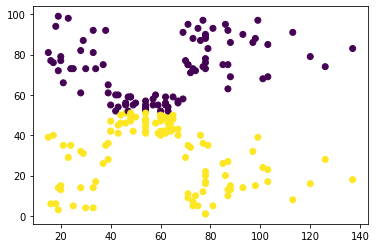

In [ ]:
kmeans= KMeans(n_clusters=2)
x=x.reshape(-1,1)
y=y.reshape(-1,1)
kmeans.fit(x)
kmeans.fit(y)
plt.scatter(x,y,c=kmeans.labels_)
plt.show()

dbscan using built in functions

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

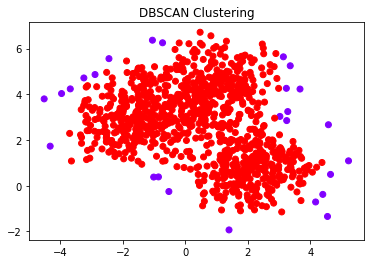

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

agglomerative using built in functions

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:

x=np.array(data["Annual Income (k$)"])
y=np.array(data["Spending Score (1-100)"])
s = np.stack((x, y), axis=-1)
clustering = AgglomerativeClustering(n_clusters =2).fit(s)
print(clustering.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


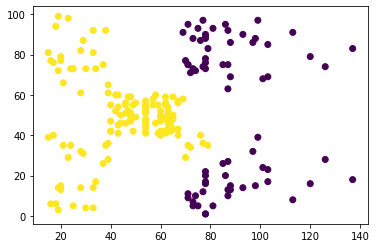

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c=clustering.labels_)
plt.show()

my own agglomerative

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def dist(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

In [ ]:

def single_linkage(distances, i, j):
    return np.min(distances[i], axis=0), j

In [ ]:

# Define agglomerative clustering function
def agglomerative_clustering(data, k):
    n = len(data)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distances[i][j] = dist(data[i], data[j])
            distances[j][i] = distances[i][j]
    clusters = [[i] for i in range(n)]
    linkage = []
    while len(clusters) > k:
        min_distance = np.inf
        merge_indices = (0, 0)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance, _ = single_linkage(distances, i, j)
                if distance < min_distance:
                    min_distance = distance
                    merge_indices = (i, j)
        i, j = merge_indices
        new_cluster = clusters[i] + clusters[j]
        clusters.pop(j)
        clusters[i] = new_cluster
        linkage.append(merge_indices + (min_distance,))
    return linkage, clusters


my own kmeans

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

In [ ]:
x=np.array(data["Annual Income (k$)"])
y=np.array(data["Spending Score (1-100)"])

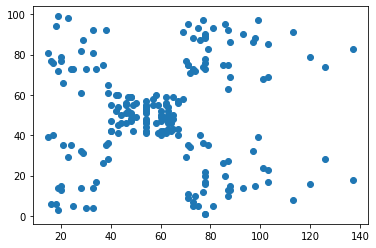

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

KeyError: ignored

my own dbscan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = data.iloc[:, [3, 4]].values

In [ ]:
def dbscan(X, eps, min_pts):
    labels = np.full(X.shape[0], -1)
    C = 0
    for i in range(X.shape[0]):
        if labels[i] != -1:
            continue
        neighbors = np.where(np.linalg.norm(X - X[i], axis=1) <= eps)[0]
        if len(neighbors) < min_pts:
            continue
        labels[i] = C
        j = 0
        while j < len(neighbors):
            neighbor = neighbors[j]
            if labels[neighbor] == -1:
                labels[neighbor] = C
                new_neighbors = np.where(np.linalg.norm(X - X[neighbor], axis=1) <= eps)[0]
                if len(new_neighbors) >= min_pts:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            elif labels[neighbor] != -1 and labels[neighbor] != C:
                pass
            j += 1
        C += 1
    return labels

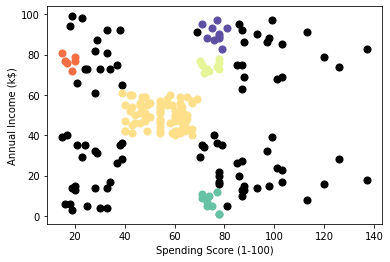

In [ ]:
labels = dbscan(X, eps=5, min_pts=5)
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for i, label in enumerate(unique_labels):
    if label == -1:
        color = 'black'
    else:
        color = colors[i]
    plt.scatter(X[labels==label, 0], X[labels==label, 1], s=50, color=color)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()